In [69]:
import numpy as np
import pandas as pd

In [70]:
df = pd.read_csv("C:/Users/Dell/Desktop/datasets/spam.csv",encoding="Latin-1")

In [71]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [72]:
df=df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df=df.rename(columns={"v1":"label","v2":"sms"})

In [73]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
X = df['sms']
Y = df['label']

In [75]:
X.shape

(5572,)

In [76]:
Y.shape

(5572,)

In [77]:
from collections import Counter
print(Counter(Y))

Counter({'ham': 4825, 'spam': 747})


In [78]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [80]:
print(Counter(Y))

Counter({0: 4825, 1: 747})


In [81]:
#data preprocessing

import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [82]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()
corpus = []

In [83]:
for i in range(0,len(X)):
    review = re.sub('[^a-zA-Z]',' ', X[i])
    review = review.lower()
    review = review.split()
    #stemming
    #review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    
    #lemmatising
    review = [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [84]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [96]:
#BY using TENSORFLOW 1.14


from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import SimpleRNN
from keras.layers.embeddings import Embedding

In [97]:
#one hot representation
voc_size = 10000

In [98]:
onehot_repr = [one_hot(word, voc_size) for word in corpus]

In [99]:
onehot_repr

[[5613,
  5378,
  2511,
  6539,
  520,
  3110,
  1428,
  8884,
  7471,
  6933,
  2545,
  3662,
  8663,
  3741,
  9036,
  7933],
 [3320, 7837, 8559, 4937, 6617, 9537],
 [805,
  781,
  7799,
  4773,
  3554,
  6625,
  3285,
  7751,
  37,
  9338,
  1042,
  3754,
  6625,
  7733,
  781,
  4926,
  5364,
  6662,
  5633,
  3667,
  3013],
 [6617, 4474, 9875, 2179, 1305, 6617, 3667, 7663, 9875],
 [7409, 2290, 5613, 9671, 7705, 6357, 5956],
 [5715,
  1732,
  6213,
  9483,
  11,
  8368,
  9805,
  5593,
  3099,
  7511,
  3320,
  5215,
  5364,
  8700,
  9964,
  733],
 [1841, 2114, 9805, 1814, 7515, 9805, 3044, 6976],
 [6900,
  2058,
  5529,
  5529,
  4257,
  1595,
  5902,
  1056,
  5874,
  711,
  4238,
  769,
  3401,
  6034,
  711],
 [134,
  2230,
  8445,
  9678,
  1614,
  6515,
  2494,
  1433,
  5181,
  3254,
  5181,
  1947,
  9025,
  3660,
  8986],
 [2609,
  7939,
  6617,
  3286,
  4250,
  1365,
  1788,
  9875,
  2609,
  7921,
  805,
  3254,
  2609,
  1365,
  1434,
  805],
 [4240, 6037, 9124, 8477,

In [145]:
#Padding 

max_length = 20
pad_docs = pad_sequences(onehot_repr, padding = 'post', maxlen=max_length)

In [146]:
pad_docs

array([[5613, 5378, 2511, ...,    0,    0,    0],
       [3320, 7837, 8559, ...,    0,    0,    0],
       [ 781, 7799, 4773, ..., 5633, 3667, 3013],
       ...,
       [8253, 5703,  794, ...,    0,    0,    0],
       [4688, 4255,  759, ...,    0,    0,    0],
       [7614, 6313, 9418, ...,    0,    0,    0]])

In [147]:
len(pad_docs[5])

20

In [148]:
pad_docs.shape

(5572, 20)

In [149]:
#model creation

dim = 50

In [150]:
model = Sequential()

#Ebedding layer
model.add(Embedding(voc_size,dim,input_length = max_length))
model.add(Dropout(0.2))

#Adding 1st RNN layer
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding 2nd RNN layer
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding 3rd RNN layer
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(1, activation='sigmoid'))

In [151]:
##compile the layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [152]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 50)            500000    
_________________________________________________________________
dropout_13 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 20, 50)            5050      
_________________________________________________________________
dropout_14 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 20, 50)            5050      
_________________________________________________________________
dropout_15 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 50)               

In [153]:
inputs = np.array(pad_docs)
Y = np.array(Y)

In [154]:
inputs

array([[5613, 5378, 2511, ...,    0,    0,    0],
       [3320, 7837, 8559, ...,    0,    0,    0],
       [ 781, 7799, 4773, ..., 5633, 3667, 3013],
       ...,
       [8253, 5703,  794, ...,    0,    0,    0],
       [4688, 4255,  759, ...,    0,    0,    0],
       [7614, 6313, 9418, ...,    0,    0,    0]])

In [155]:
inputs.shape

(5572, 20)

In [156]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [157]:
#splitting the train and test data

from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(inputs, Y, test_size=0.24, random_state = 0)

In [158]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4234, 20), (1338, 20), (4234,), (1338,))

In [159]:
ss = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 10, batch_size = 64)


Train on 4234 samples, validate on 1338 samples
Epoch 1/10
4234/4234 [==============================] - 7s 2ms/step - loss: 0.2306 - accuracy: 0.9039 - val_loss: 0.1139 - val_accuracy: 0.9694
Epoch 2/10
4234/4234 [==============================] - 3s 789us/step - loss: 0.0578 - accuracy: 0.9870 - val_loss: 0.1148 - val_accuracy: 0.9738
Epoch 3/10
4234/4234 [==============================] - 3s 641us/step - loss: 0.0374 - accuracy: 0.9910 - val_loss: 0.0823 - val_accuracy: 0.9738
Epoch 4/10
4234/4234 [==============================] - 3s 664us/step - loss: 0.0186 - accuracy: 0.9962 - val_loss: 0.0864 - val_accuracy: 0.9783
Epoch 5/10
4234/4234 [==============================] - 3s 680us/step - loss: 0.0126 - accuracy: 0.9976 - val_loss: 0.0952 - val_accuracy: 0.9798
Epoch 6/10
4234/4234 [==============================] - 3s 610us/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.1116 - val_accuracy: 0.9738
Epoch 7/10
4234/4234 [==============================] - 4s 844us/step - loss:

In [160]:
Y_pred = model.predict_classes(X_test)

In [161]:
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [166]:
Y_test.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [170]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [172]:
print("confusion matrix:", confusion_matrix(Y_test, Y_pred)

confusion matrix: [[1145    4]
 [  28  161]]


In [173]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1149
           1       0.98      0.85      0.91       189

    accuracy                           0.98      1338
   macro avg       0.98      0.92      0.95      1338
weighted avg       0.98      0.98      0.98      1338



In [175]:
print(accuracy_score(Y_test, Y_pred))

0.976083707025411


In [176]:
#Data visualization

import matplotlib.pyplot as plt

In [177]:
ss.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

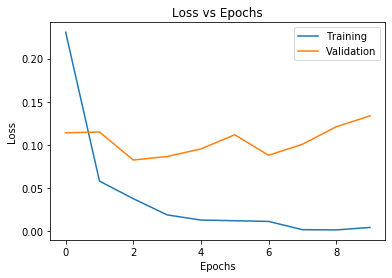

In [181]:
#loss

plt.plot(ss.history['loss'], label = 'Training')
plt.plot(ss.history['val_loss'], label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

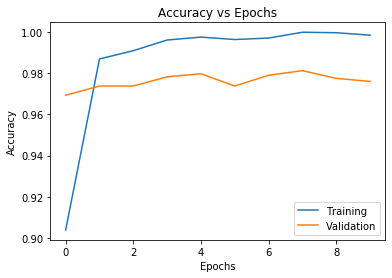

In [183]:
#Accuracy

plt.plot(ss.history['accuracy'], label = 'Training')
plt.plot(ss.history['val_accuracy'], label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()